## Prompt

Your objective is to convey a story about my work commute via bicycle. Namely:	
+ What are your observations?
+ How would you describe any trends / changes over time?
+ How do different factors affect my time?
+ What, if any, are the implications of your findings?

## Analysis Questions

1. Does weather have an impact on trip time?
2. Does the time of day (loosely inferred from going to or from work) have an influence?
3. Is one route faster in MPH than another?
4. Does the frequency of commutes or days between most recent commute make a difference?
5. Is there an increase in fitness over time?

### Basic Set-up

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

data_folder = 'data'

# load the data from the CSV files
trips = pd.read_csv(os.path.join(data_folder, 'bike_trips.csv'))
routes = pd.read_csv(os.path.join(data_folder, 'routes.csv'))

### Joining Data and Creating Variables

In [5]:
# merge data sets
bike_trips = pd.merge(trips, routes, on='route', how='left')

# time to seconds and calculate speed in MPH
bike_trips['time_seconds'] = pd.to_timedelta(bike_trips['time']).dt.total_seconds()

bike_trips['speed_mph'] = bike_trips['distance_miles'] / (bike_trips['time_seconds'] / 3600)

# basic stats
descriptive_stats = {
    'Average Trip Duration (seconds)': round(bike_trips['time_seconds'].mean(), 4),
    'Average Distance per Trip (miles)': round(bike_trips['distance_miles'].mean(), 4),
    'Average Speed (mph)': round(bike_trips['speed_mph'].mean(), 4),
    'Total Trips': bike_trips['route'].count()
}
print(f'Data Snapshot: {bike_trips.head()}')

Data Snapshot:       date  temperature_f destination     time route  distance_miles  \
0  3/20/19             26        Work  0:36:36     A             7.4   
1  3/20/19             56        Home  0:40:54     A             7.4   
2  3/28/19             39        Work  0:35:01     A             7.4   
3  3/28/19             61        Home  0:39:20     A             7.4   
4   4/3/19             35        Work  0:36:49     A             7.4   

   time_seconds  speed_mph  
0        2196.0  12.131148  
1        2454.0  10.855746  
2        2101.0  12.679676  
3        2360.0  11.288136  
4        2209.0  12.059756  


In [6]:
print(f'Descriptive Statistics: \n {descriptive_stats}')

Descriptive Statistics: 
 {'Average Trip Duration (seconds)': 2160.904, 'Average Distance per Trip (miles)': 7.4144, 'Average Speed (mph)': 12.4555, 'Total Trips': 125}


## Plotting

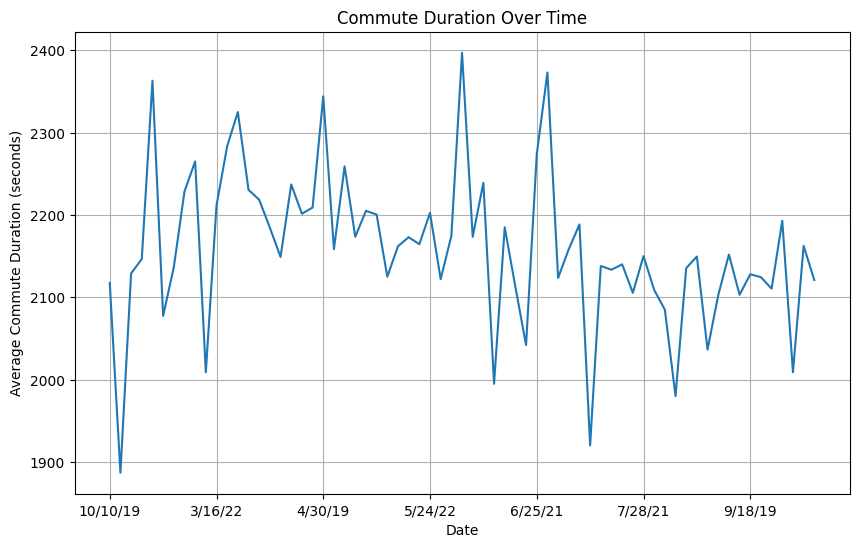

In [7]:
plt.figure(figsize=(10, 6))
bike_trips.groupby('date')['time_seconds'].mean().plot(kind='line', title='Commute Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Average Commute Duration (seconds)')
plt.grid(True)
plt.show()

## Further Considerations

These are some of the other factors worth considering for further analysis. 

1. More robust weather data, look into rain/snow/humidity
2. Collect heart rate data to better understand improvements in fitness resulting in shorter trips
3. Add data on the routes. The elevation of a route or if it goes through a city (more stoplights) could impact the transit time.
4. External changes like a new bike, other exercise